<a href="https://colab.research.google.com/github/tanatiem/geospatial/blob/master/thailand_weather_stations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# install geopandas and non-out-of-the-box dependencies
!pip install geopandas
!pip install descartes

In [0]:
import geopandas as gpd
import matplotlib.pyplot as plt

import os
from google.colab import drive
from google.colab import auth

In [0]:
drive.mount('drive')

In [6]:
path = 'drive/My Drive/datasets/gis/'
file = path + 'THA_Adm1_GISTA_plyg_v5.shp'

th_prov = gpd.read_file(file, encoding='utf-8')
th_prov.head()

,ISO,PROV_NAMT,Adm1Name,Adm1Code,Adm0Name,Admin0Code,geometry
0,TH,เชียงใหม่,Chiang Mai,TH50,Thailand,TH,(POLYGON ((98.68537518300009 17.79096202600007...
1,TH,เชียงราย,Chiang Rai,TH57,Thailand,TH,"POLYGON ((99.96093267100008 20.46481752000004,..."
2,TH,เพชรบุรี,Phetchaburi,TH76,Thailand,TH,"POLYGON ((99.75868789400009 13.34248537700006,..."
3,TH,เพชรบูรณ์,Phetchabun,TH67,Thailand,TH,"POLYGON ((101.3987111830001 17.17792268400013,..."
4,TH,เลย,Loei,TH42,Thailand,TH,"POLYGON ((102.095046615 18.21708373300006, 102..."


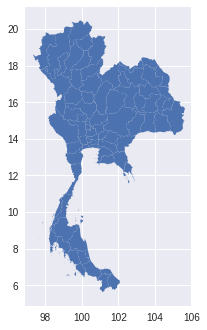

In [7]:
th_prov.plot();

In [8]:
bkk_dist = gpd.read_file(path+'th_district.shp', encoding='windows-874')
bkk_dist.head()

,OBJECTID,AREA,dcode,dname,dname_e,pcode,no_female,pname,no_male,no_health,no_temple,no_commu,no_hos,no_sch,geometry
0,29,11804564.0,1025,เขตบางพลัด,Bang Phlat,10,53750,กรุงเทพมหานคร,46569,1,23,46,0,11,"POLYGON ((663924.7937945767 1526162.056938286,..."
1,30,16319268.0,1017,เขตห้วยขวาง,Huai Khwang,10,42026,กรุงเทพมหานคร,35694,2,3,25,0,3,"POLYGON ((671711.8643430001 1526487.43818799, ..."
2,31,17075578.0,1045,เขตวังทองหลาง,Wang Thong Lang,10,62158,กรุงเทพมหานคร,52925,0,1,19,0,3,"POLYGON ((674358.11780704 1525633.939320863, 6..."
3,32,51732144.0,1048,เขตทวีวัฒนา,Thawi Watthana,10,40264,กรุงเทพมหานคร,35196,1,3,13,0,6,"POLYGON ((650975.092365072 1526253.297860021, ..."
4,33,128628048.0,1011,เขตลาดกระบัง,Lat Krabang,10,83816,กรุงเทพมหานคร,77034,2,13,60,1,20,"POLYGON ((694058.0761932073 1525667.705673218,..."


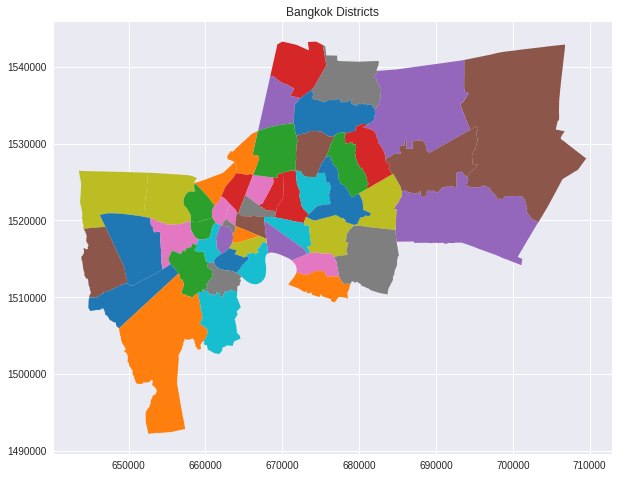

In [9]:
f, ax = plt.subplots(figsize=(10,10))
bkk_dist.plot(column='dname_e', ax=ax);
ax.set_title('Bangkok Districts');

In [0]:
auth.authenticate_user()

In [10]:
%%bigquery --project tanat-project rs
SELECT * FROM `bigquery-public-data.noaa_gsod.stations` 
WHERE country = 'TH' and `end` > '20180101'

,usaf,wban,name,country,state,call,lat,lon,elev,begin,end
0,483270,99999,CHIANG MAI INTL,TH,None,VTCC,18.767,98.963,+0315.8,19421231,20181112
1,483540,99999,UDON THANI,TH,None,VTUD,17.386,102.788,+0176.5,19421231,20181112
2,484560,99999,BANGKOK INTL,TH,None,VTBD,13.913,100.607,+0002.7,19421231,20181112
3,485680,99999,SONGKHLA,TH,None,VTSH,7.187,100.608,+0003.7,19421231,20181112
4,484310,99999,KHORAT,TH,None,VTUN,14.935,102.079,+0222.2,19490102,20181112
5,484750,99999,HUA HIN,TH,None,VTPH,12.636,99.952,+0018.9,19490102,20181112
6,485170,99999,CHUMPHON,TH,None,VTSE,10.711,99.362,+0005.5,19490102,20181112
7,485000,99999,PRACHUAP,TH,None,VTBP,11.788,99.805,+0003.0,19490102,20181112
8,484550,99999,BANGKOK METROPOLIS,TH,None,None,13.733,100.567,+0004.0,19490102,20181112
9,483510,99999,UTTARADIT,TH,None,VTPU,17.617,100.100,+0064.0,19490103,20181112


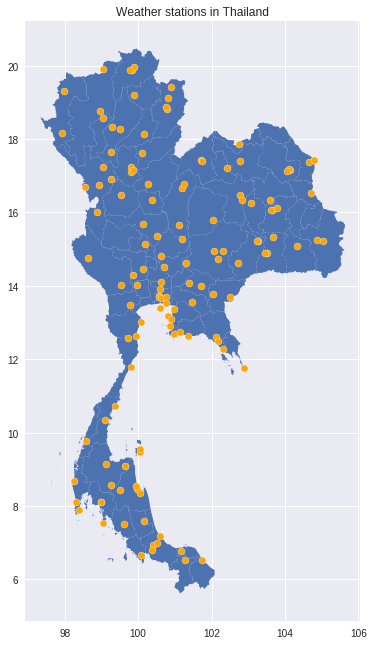

In [12]:
f, ax = plt.subplots(figsize=(6,12))
th_prov.plot(ax=ax)
plt.scatter(x=rs['lon'], y=rs['lat'], color='orange', edgecolor='white')
plt.title('Weather stations in Thailand');